# Life Expectancy GDP Project

For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.

After you perform your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website

## What are we analyzing?

Describe data

## Questions to be answered

Give analysis questions

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

In [55]:
df = pd.read_csv("all_data.csv")
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Exploring the Data

Utilizing the unique function of the pandas library, we are able to view the distinct countries and years within the dataset.
This step shows us that there are six different countries: Chile, China, Germany, Mexico, United States of America, and Zimbabwe.
Additionally, we can see that the data ranges from 2000 to 2015.

In [56]:
print(df.Country.unique())
print(df.Year.unique())



['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Cleaning Data

To clean the data, I changed the column names to be lowercase and shortened, when necessary.

In [57]:
df.rename(columns = {'Country': 'country', 'Year':'year', 'Life expectancy at birth (years)' : 'life_expectancy', 'GDP':'gdp'}, inplace = True)
print(df.head())

  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## Exploring the Data with Graphs

From the exploratory plots, it can be seen that there are several keys ideas to grasp from the data.  

In [67]:
def create_boxplot(x, y, dataset):
    sns.boxplot(x=x, y=y, data=dataset)
    mean = np.mean(dataset[y])
    plt.axhline(mean, color = 'black', ls = '--')
    plt.show()
    plt.clf()

def create_hist(column, dataset):
    sns.histplot(x=column, data = dataset)
    mean = np.mean(dataset[column])
    median = np.median(dataset[column])
    plt.axvline(mean, color = 'red', ls = '--', label = 'mean')
    plt.axvline(median, color = 'black', ls = '--', label = 'median')
    plt.legend()
    plt.show()
    plt.clf()

def create_lineplot(x, y, dataset, hue):
    sns.lineplot(x=x, y=y,data=dataset,hue=hue)
    plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.clf()  

def create_barchart(x, y, dataset):
    sns.barplot(x=x, y=y, data=dataset)
    plt.show()
    plt.clf()

def create_scatterplot(x, y, dataset, hue):
    sns.scatterplot(x=x, y=y, data=dataset, hue=hue)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.clf()

def create_lineplot_grid(x, y, dataset, hue):
    plot = sns.FacetGrid(data=dataset, col=hue, col_wrap=3, hue=hue, sharey = False)
    plot.map(sns.lineplot(x,y)).add_legend()
    plot


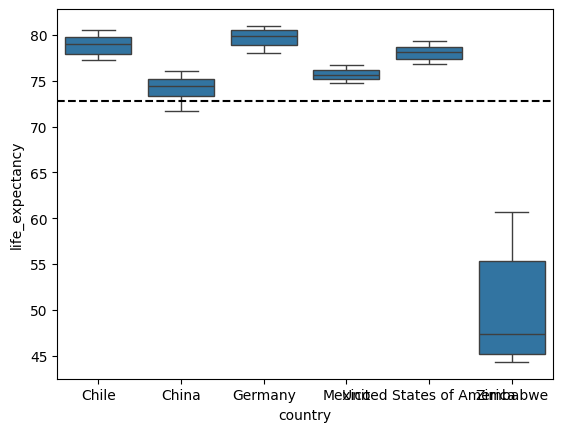

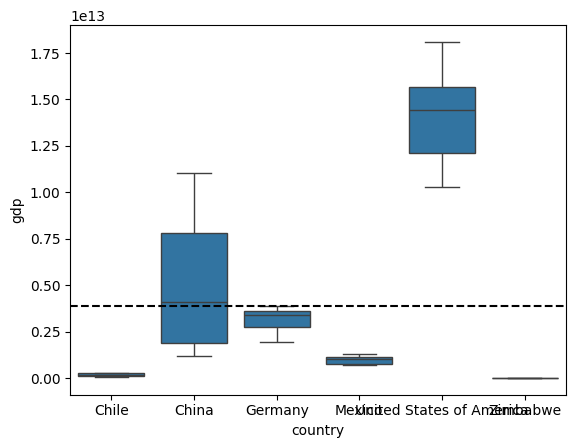

<Figure size 640x480 with 0 Axes>

In [59]:
create_boxplot('country', 'life_expectancy', df)
create_boxplot('country', 'gdp', df)

 The first box plot shows that Zimbabwe has the lowest life expectancy out of all of the countries while the other five countries are relatively similar. Secondly, the next box plot shows the comparison of GDP for each of the countries. The visualization shows that the United States of America generally has a higher GDP than the other countries in the dataset.

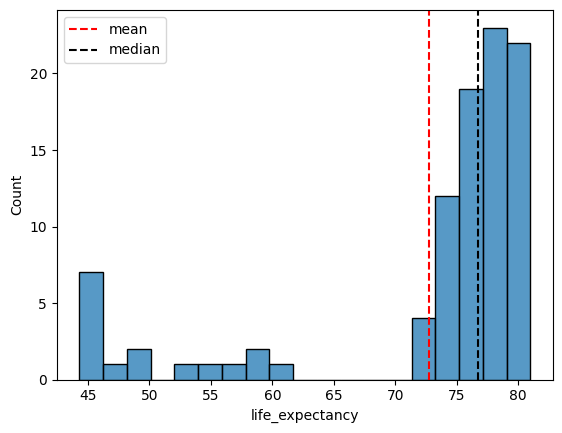

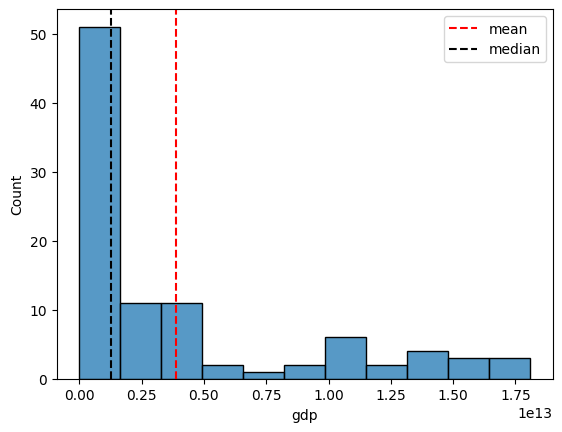

<Figure size 640x480 with 0 Axes>

In [60]:
create_hist('life_expectancy', df)
create_hist('gdp', df)

As for the histograms from the data, the life expectancy data is left skewed whereas the GDP data is right skewed.

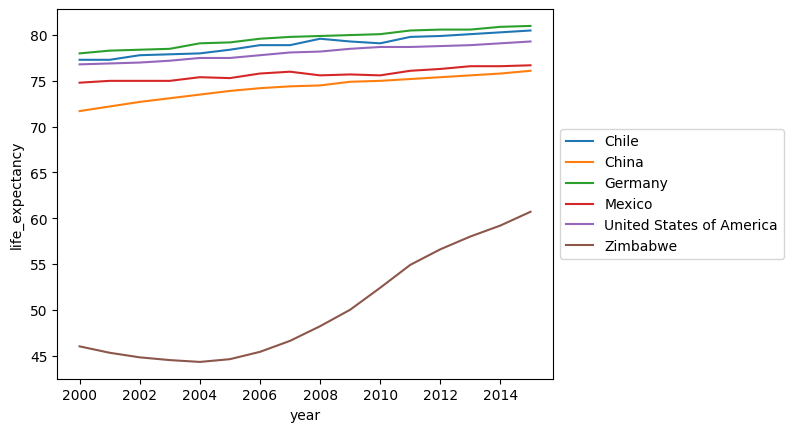

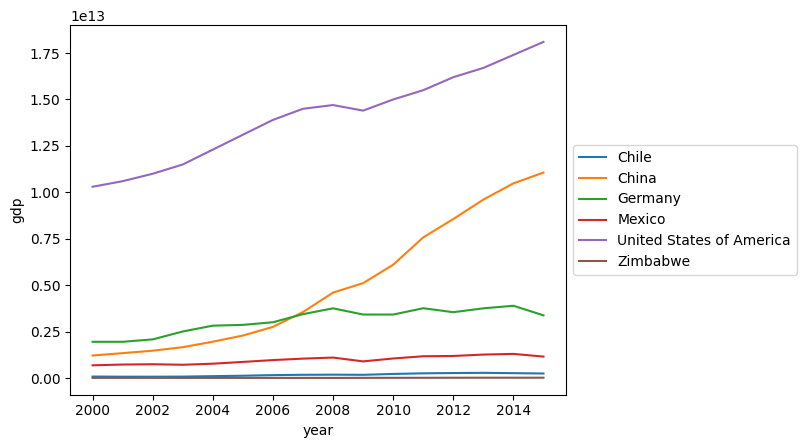

<Figure size 640x480 with 0 Axes>

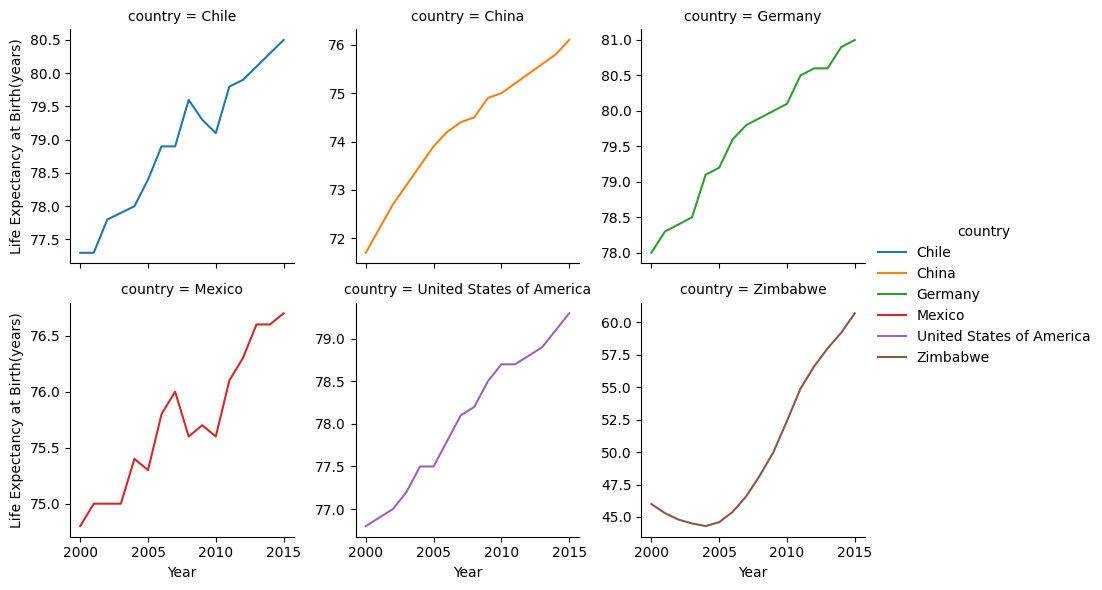

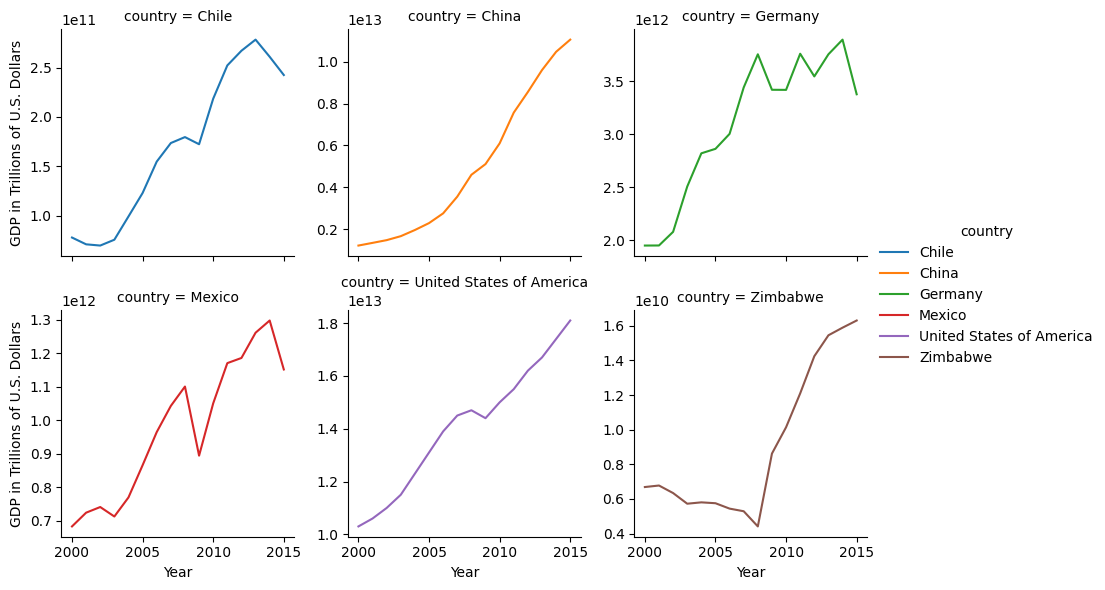

In [74]:
create_lineplot('year', 'life_expectancy', df, 'country')
create_lineplot('year', 'gdp', df, 'country')

graph_life_expectancy = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False)

graph_life_expectancy = (graph_life_expectancy.map(sns.lineplot,"year","life_expectancy")
         .add_legend()
         .set_axis_labels("Year","Life Expectancy at Birth(years)"))

graph_life_expectancy

graphGDP = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"year","gdp")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP


In observing the line graph that shows life expectancy, we see that Zimbabwe has been consistently lower than the other countries, but begins to increase over the last eight years of the data (2006-2014). Within the line graph for GDP over time, it shows how the United States of America is consistently higher than the other countries. Additionally, China shows a noticible increase over the last six years of data (2008-2014).

To easily see the averages of the dataset, the data can be summarized by the average life expectancy and GDP for each country.

In [62]:
df_average = df.drop('year', axis = 1).groupby('country').mean().reset_index()
df_average

,country,life_expectancy,gdp
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


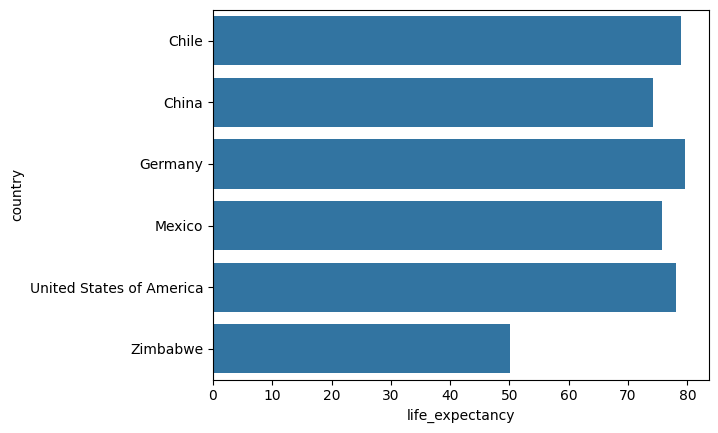

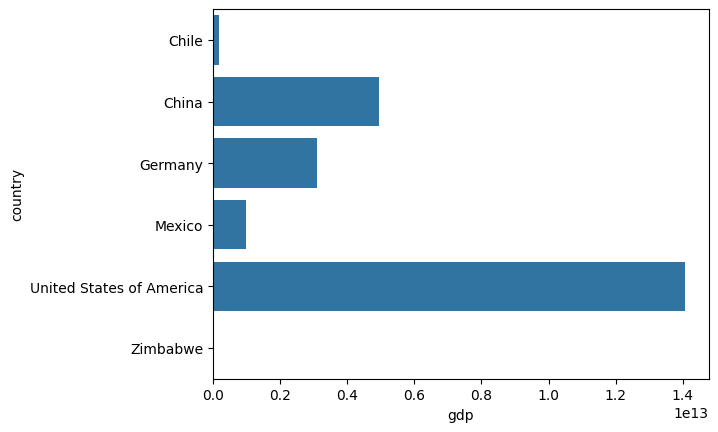

<Figure size 640x480 with 0 Axes>

In [63]:
create_barchart('life_expectancy','country', df_average)
create_barchart('gdp', 'country', df_average)

The bar graphs above, represent the average life expectancy or gdp for each country. The first graph describes how Chile, China, Germany, Mexico, and United States of America have a similar average life expectancy. Opposingly, Zimbabwe has a relatively much lower life expectancy than the other countries. For the second bar graph, the average GDP for each country is represented. It is shown that United States of America has a much higher average GDP across the data than the other countries. Additionally, the significant increase that China was seen to have in the line graphs is represented with the average GDP being the second largest of the group. 

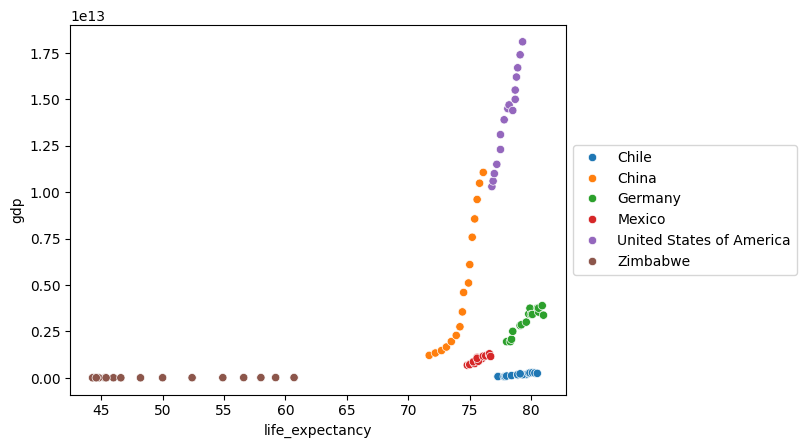

<Figure size 640x480 with 0 Axes>

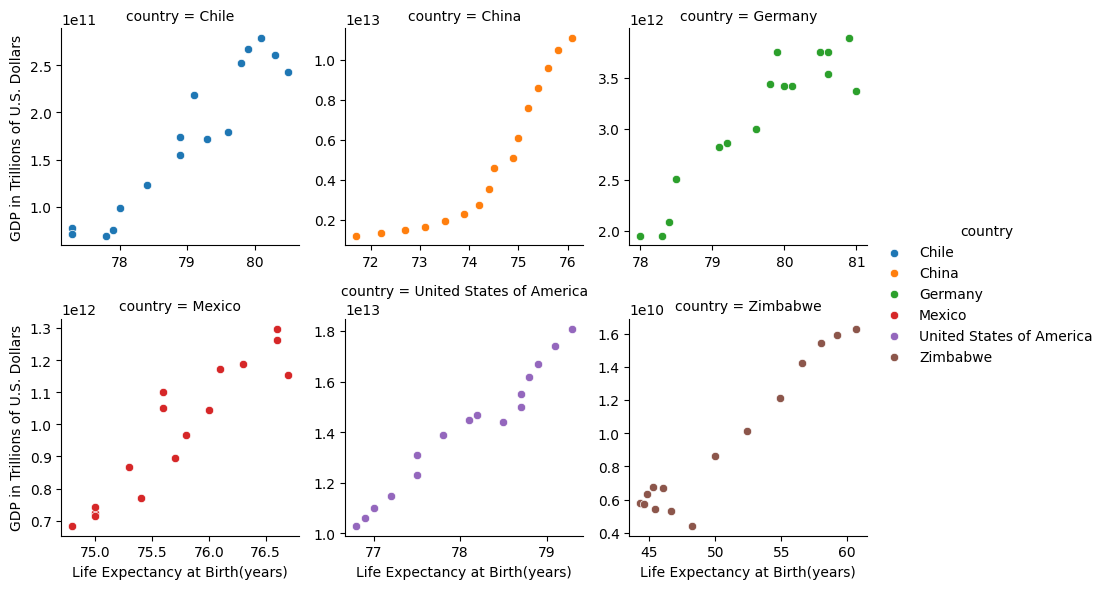

In [76]:
create_scatterplot('life_expectancy', 'gdp', df, 'country')

graph_life_gdp = sns.FacetGrid(df, col="country", col_wrap=3,
                      hue = "country", sharey = False, sharex = False)

graph_life_gdp = (graph_life_gdp.map(sns.scatterplot,"life_expectancy","gdp")
         .add_legend()
         .set_axis_labels("Life Expectancy at Birth(years)","GDP in Trillions of U.S. Dollars"))

graph_life_gdp